In [9]:
import yfinance as yf

stock_tickers =['META', 'NFLX', 'TSLA','NVDA','AMZN','AAPL','GOOGL','INTC']

database = yf.download(stock_tickers,start='2012-01-01',end ='2025-01-01',auto_adjust=True)
database = database['Close']
data = database.dropna().pct_change(1).dropna()
data

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMZN,GOOGL,INTC,META,NFLX,NVDA,TSLA
Date,,,,,,,,
2012-05-21,0.058260,0.019921,0.022835,0.003068,-0.109861,0.025443,0.017384,0.043904
2012-05-22,-0.007679,-0.012746,-0.021674,-0.004589,-0.089039,-0.056175,-0.012205,0.070559
2012-05-23,0.024400,0.009056,0.014414,-0.022666,0.032258,0.062029,0.024712,0.007143
2012-05-24,-0.009184,-0.009389,-0.009517,0.008255,0.032187,-0.022806,-0.026527,-0.023855
2012-05-25,-0.005360,-0.010918,-0.020094,0.003509,-0.033909,-0.000711,0.023947,-0.015522
...,...,...,...,...,...,...,...,...
2024-12-24,0.011478,0.017729,0.007604,0.009901,0.013170,0.022678,0.003938,0.073572
2024-12-26,0.003176,-0.008732,-0.002601,0.001961,-0.007240,-0.008561,-0.002068,-0.017630
2024-12-27,-0.013242,-0.014534,-0.014519,-0.006849,-0.005867,-0.017952,-0.020868,-0.049479


In [10]:
from matplotlib.pyplot import axis
import numpy as np

def Sortino_Criterion(weight,data):
    portfolio_return = np.multiply(data,np.transpose(weight))
    portfolio_return = portfolio_return.sum(axis=1)
    mean = np.mean(portfolio_return,axis = 0)
    std = np.std(portfolio_return[portfolio_return <0],axis =0)
    
    Sortino = mean/std
    Sortino =-Sortino
    return Sortino

In [11]:
import numpy as np
from scipy.optimize import minimize

validation_score = 0.3
train_size = int(len(data)*(1-validation_score))
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

n = train_data.shape[1]

# Different initial guess strategy
x0 = np.ones(n)  # Ensures weights sum to 1

# Constraints
cons = ({'type': 'eq', 'fun': lambda x: np.sum(abs(x)) - 1})  # All weights non-negative

# Bounds
Bounds = [(0, 1) for _ in range(n)]

# Optimization with more iterations
res = minimize(Sortino_Criterion, x0, args=(data,), method='SLSQP', constraints=cons, bounds=Bounds, options={'disp': False})

# Print results
optimal_portfolio_weights = res.x
optimal_portfolio_weights

array([0.00000000e+00, 0.00000000e+00, 1.13289576e-17, 2.24249168e-17,
       0.00000000e+00, 2.05124633e-01, 5.34097682e-01, 2.60777685e-01])

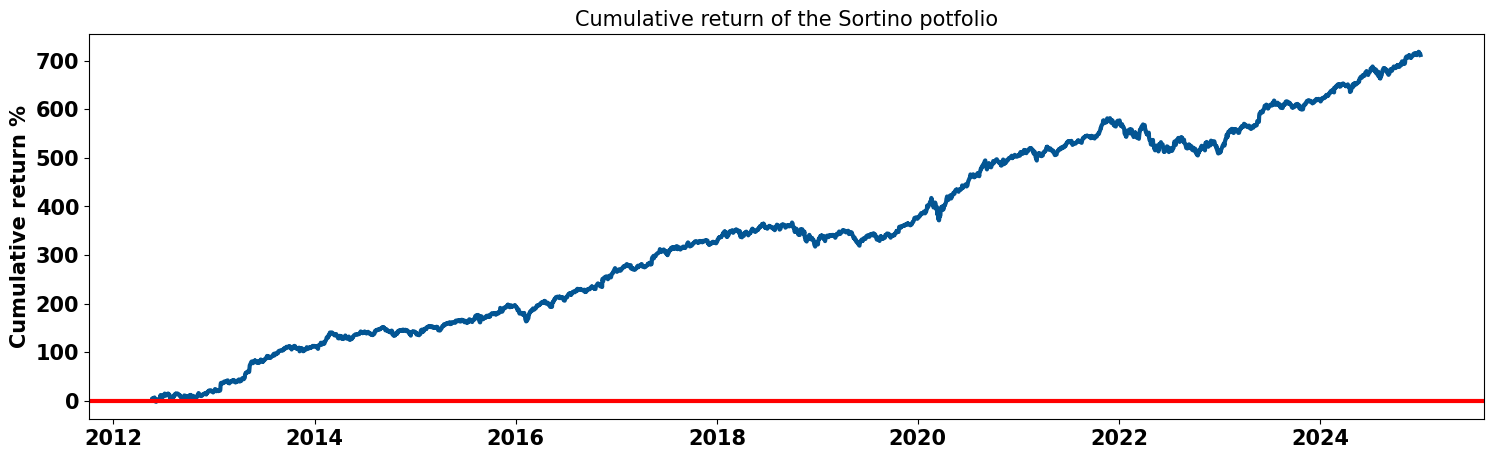

In [12]:
import matplotlib.pyplot as plt

optimal_portfolio_return = np.multiply(data,np.transpose(optimal_portfolio_weights))
optimal_portfolio_return = optimal_portfolio_return.sum(axis=1)

plt.figure(figsize=(18,5))
plt.plot(np.cumsum(optimal_portfolio_return)*100,color="#035593",linewidth=3)
plt.ylabel("Cumulative return %", size=15,fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the Sortino potfolio", size=15)
plt.axhline(0, color="r",linewidth=3)
plt.show()